In [21]:
%matplotlib inline

In [5]:
#dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime


In [6]:
#make random latlong pairs
np.random.seed(2022)
lats = np.random.uniform(-90, 90, size = 1500)
longs = np.random.uniform(-180, 180, size = 1500)

lat_longs = zip(lats, longs)

coordinates = list(lat_longs)

In [7]:
#make list of cities from those latlongs
cities = []

for coordinate in coordinates:
    #identify the nearest city
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #check to see if we have that city and if not, add it to the list
    if city not in cities:
        cities.append(city)

In [8]:
# list to hold weather data
city_data = []
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# print beggining of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#set up counters
record_count = 1
set_count = 1


for i, city in enumerate(cities):

    #Group cities in sets of 50 to avoid timing out
    if (i % 50 == 0) and (i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)

    #log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #build city url note: replace is taking spaces in names and replacing them with + to not just get data for first part of name
    city_url = url + "&q=" + city

    #run an api request on city
    try:
        #get the json data
        city_weather = requests.get(city_url).json()

        #parse the data
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_winds = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        #convert date
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")

        #add city data to the list
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Long": city_long,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_winds,
                        "Country": city_country,
                        "Date": city_date})
    
    #skip the city if it isn't found
    except:
        print(f"City not found. Skipping...")
        pass 

    #add 1 to record count
    record_count += 1

#note that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | payakumbuh
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | northport
Processing Record 6 of Set 1 | lorengau
Processing Record 7 of Set 1 | srednekolymsk
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | boksitogorsk
Processing Record 12 of Set 1 | kosya
City not found. Skipping...
Processing Record 13 of Set 1 | kirillov
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | taoudenni
Processing Record 19 of Set 1 | tasiilaq
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | wisconsin rapids
Processing Record 22 of Set 1 | lebu
Pro

In [11]:
#build data frame from the city data list
city_data_df = pd.DataFrame(city_data)

#reorder
column_order =  ["City", "Country", "Date", "Lat", "Long", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]


In [13]:
#save the city and weather data to a csv

output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# extract relevant columns for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

today = time.strftime("%x")

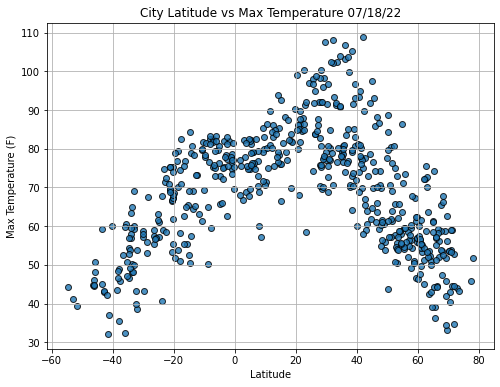

In [38]:
#set up max temp figure
fig, ax1 = plt.subplots(figsize = (8,6))
fig.set_facecolor("w")

#define scatter plot
ax1.scatter(lats, max_temps,
        edgecolor = "k",
        linewidths = 1,
        marker = "o",
        alpha = 0.8,
        label = "Cities")

#set labels and turn grid on
ax1.set(xlabel = "Latitude",
        ylabel = "Max Temperature (F)",
        title = f"City Latitude vs Max Temperature " + today)
plt.grid(True)


#save and show
plt.savefig("weather_data/Fig1.png")

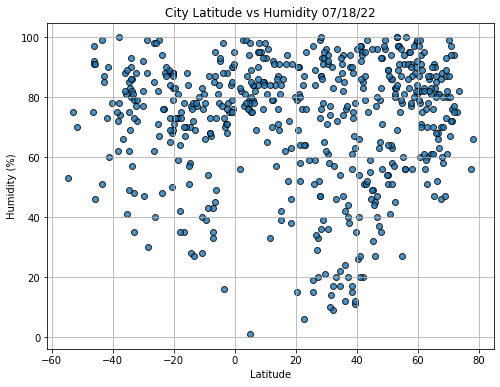

In [36]:
#set up humidity figure
fig, ax2 = plt.subplots(figsize = (8,6))
fig.set_facecolor("w")

#define scatter plot
ax2.scatter(lats, humidity,
        edgecolor = "k",
        linewidths = 1,
        marker = "o",
        alpha = 0.8,
        label = "Cities")

#set labels and turn grid on
ax2.set(xlabel = "Latitude",
        ylabel = "Humidity (%)",
        title = f"City Latitude vs Humidity " + today)
plt.grid(True)


#save and show
plt.savefig("weather_data/Fig2.png")

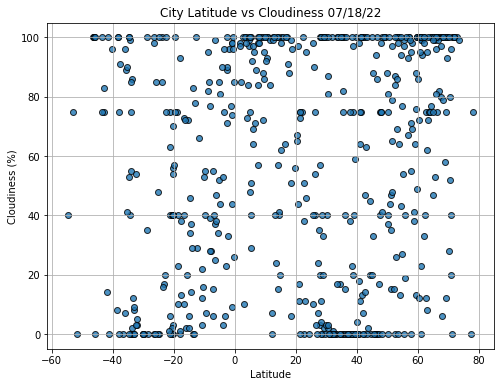

In [37]:
#set up cloudiness figure
fig, ax3 = plt.subplots(figsize = (8,6))
fig.set_facecolor("w")

#define scatter plot
ax3.scatter(lats, cloudiness,
        edgecolor = "k",
        linewidths = 1,
        marker = "o",
        alpha = 0.8,
        label = "Cities")

#set labels and turn grid on
ax3.set(xlabel = "Latitude",
        ylabel = "Cloudiness (%)",
        title = f"City Latitude vs Cloudiness " + today)
plt.grid(True)


#save and show
plt.savefig("weather_data/Fig3.png")


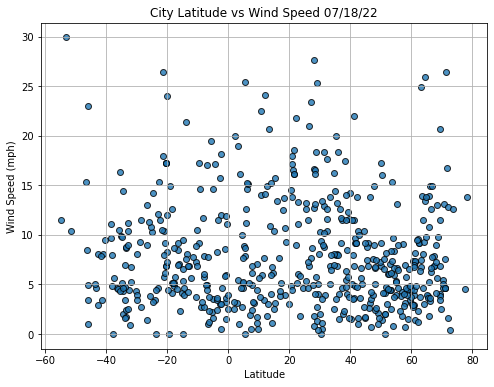

In [39]:
#set up wind speed figure
fig, ax4 = plt.subplots(figsize = (8,6))
fig.set_facecolor("w")

#define scatter plot
ax4.scatter(lats, wind_speed,
        edgecolor = "k",
        linewidths = 1,
        marker = "o",
        alpha = 0.8,
        label = "Cities")

#set labels and turn grid on
ax4.set(xlabel = "Latitude",
        ylabel = "Wind Speed (mph)",
        title = f"City Latitude vs Wind Speed " + today)
plt.grid(True)


#save and show
plt.savefig("weather_data/Fig4.png")
plt.show()